Importing the necessary libraries and loading the dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/My Drive/insurance.txt', sep=",")

In [4]:
df = df.sample(frac = 1) 

In [5]:
df.head()

,age,bmi,children,charges
716,49,22.610,1,9566.99090
885,32,28.930,1,19719.69470
1183,48,27.360,1,9447.38240
1301,62,30.875,3,46718.16325
602,56,25.300,0,11070.53500


In [6]:
dummy = [1]*len(df)

In [7]:
norm_df=(df-df.mean())/df.std()

In [8]:
norm_df.head()

,age,bmi,children,charges
716,0.697011,-1.320622,-0.078738,-0.305816
885,-0.512957,-0.284248,-0.078738,0.532557
1183,0.625836,-0.541701,-0.078738,-0.315693
1301,1.622280,0.034699,1.580335,2.761991
602,1.195233,-0.879507,-0.908274,-0.181659


In [9]:
norm_df["bias"] = dummy

In [10]:
norm_df.head()

,age,bmi,children,charges,bias
716,0.697011,-1.320622,-0.078738,-0.305816,1
885,-0.512957,-0.284248,-0.078738,0.532557,1
1183,0.625836,-0.541701,-0.078738,-0.315693,1
1301,1.622280,0.034699,1.580335,2.761991,1
602,1.195233,-0.879507,-0.908274,-0.181659,1


In [11]:
df_size = len(norm_df)

In [12]:
train_df = norm_df[0:int(df_size*0.7)]
test_df = norm_df[int(df_size*0.7):]

In [13]:
X_train = train_df.drop(columns = ["charges"])
X_test = test_df.drop(columns = ["charges"])

In [14]:
X_train.head()

,age,bmi,children,bias
716,0.697011,-1.320622,-0.078738,1
885,-0.512957,-0.284248,-0.078738,1
1183,0.625836,-0.541701,-0.078738,1
1301,1.622280,0.034699,1.580335,1
602,1.195233,-0.879507,-0.908274,1


In [15]:
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()

In [16]:
y_train = train_df.drop(columns = ["age", "bmi", "children", "bias"])
y_train = y_train.to_numpy()

y_test = test_df.drop(columns = ["age", "bmi", "children", "bias"])
y_test = y_test.to_numpy()

**NORMAL EQUATIONS**

In [17]:
def normal_eqn(X, y):
  X_trans = np.transpose(X)
  temp1 = np.dot(X_trans, X)
  temp1 = np.linalg.inv(temp1)
  temp2 = np.dot(X_trans, y)
  res = np.dot(temp1, temp2)
  return res

In [18]:
theta = normal_eqn(X_train, y_train)

In [19]:
theta

array([[ 0.25597541],
       [ 0.16812773],
       [ 0.05540222],
       [-0.00392252]])

20 MODELS WITH DIFF TRAIN-TEST SPLIT

In [28]:
MSE_train_errors = []
MSE_test_errors = []
RMSE_train_errors = []
RMSE_test_errors = []
MAE_train_errors = []
MAE_test_errors = []

for i in range(20):
  norm_df = norm_df.sample(frac = 1) 
  train_df = norm_df[0:int(df_size*0.7)]
  test_df = norm_df[int(df_size*0.7):]

  X_train = train_df.drop(columns = ["charges"])
  X_test = test_df.drop(columns = ["charges"])

  X_train = X_train.to_numpy()
  X_test = X_test.to_numpy()

  y_train = train_df.drop(columns = ["age", "bmi", "children", "bias"])
  y_train = y_train.to_numpy()

  y_test = test_df.drop(columns = ["age", "bmi", "children", "bias"])
  y_test = y_test.to_numpy()

  theta = normal_eqn(X_train, y_train)
  y_predict_test = np.dot(X_test, theta)
  y_predict_train = np.dot(X_train, theta)

  MSE_test = np.mean(np.square(y_predict_test-y_test))
  MSE_train = np.mean(np.square(y_predict_train-y_train))
  MAE_test = np.mean(np.abs(y_predict_test-y_test))
  MAE_train = np.mean(np.abs(y_predict_train-y_train))
  RMSE_train = np.sqrt(MSE_train)
  RMSE_test = np.sqrt(MSE_test)

  MSE_train_errors.append(MSE_train)
  MSE_test_errors.append(MSE_test)
  RMSE_train_errors.append(RMSE_train)
  RMSE_test_errors.append(RMSE_test)
  MAE_train_errors.append(MAE_train)
  MAE_test_errors.append(MAE_test)

  print("Done with model ", i+1)

Done with model  1
Done with model  2
Done with model  3
Done with model  4
Done with model  5
Done with model  6
Done with model  7
Done with model  8
Done with model  9
Done with model  10
Done with model  11
Done with model  12
Done with model  13
Done with model  14
Done with model  15
Done with model  16
Done with model  17
Done with model  18
Done with model  19
Done with model  20


In [29]:
print("Error statistics: ")
print("MSE Train error: ")
print("Mean = ", np.mean(MSE_train_errors), " Variance = ", np.std(MSE_train_errors)**2, " Min = ", np.min(MSE_train_errors))
print("-----------------------------------------")
print("MSE Test error: ")
print("Mean = ", np.mean(MSE_test_errors), " Variance = ", np.std(MSE_test_errors)**2, " Min = ", np.min(MSE_test_errors))
print("-----------------------------------------")
print("RMSE Train error: ")
print("Mean = ", np.mean(RMSE_train_errors), " Variance = ", np.std(RMSE_train_errors)**2, " Min = ", np.min(RMSE_train_errors))
print("-----------------------------------------")
print("MSE Test error: ")
print("Mean = ", np.mean(RMSE_test_errors), " Variance = ", np.std(RMSE_test_errors)**2, " Min = ", np.min(RMSE_test_errors))
print("-----------------------------------------")
print("MAE Train error: ")
print("Mean = ", np.mean(MAE_train_errors), " Variance = ", np.std(MAE_train_errors)**2, " Min = ", np.min(MAE_train_errors))
print("-----------------------------------------")
print("MAE Test error: ")
print("Mean = ", np.mean(MAE_test_errors), " Variance = ", np.std(MAE_test_errors)**2, " Min = ", np.min(MAE_test_errors))
print("-----------------------------------------")

Error statistics: 
MSE Train error: 
Mean =  0.8734721141930943  Variance =  0.00038929995140091585  Min =  0.8453869332246503
-----------------------------------------
MSE Test error: 
Mean =  0.8961575279077614  Variance =  0.002072590339602423  Min =  0.8062825133363576
-----------------------------------------
RMSE Train error: 
Mean =  0.9345380586256858  Variance =  0.0001107311732279902  Min =  0.9194492553831616
-----------------------------------------
MSE Test error: 
Mean =  0.9463455113098812  Variance =  0.0005877011314009337  Min =  0.8979323545436803
-----------------------------------------
MAE Train error: 
Mean =  0.7399677004401976  Variance =  0.00013946199977904843  Min =  0.7219538543673777
-----------------------------------------
MAE Test error: 
Mean =  0.7489091844112054  Variance =  0.0001307706366269195  Min =  0.730040985970641
-----------------------------------------


**GRADIENT DESCENT**

In [ ]:
def init_params(lenw):
  w = np.random.rand(1, lenw)
  b = 0
  return w, b

In [ ]:
def predict(X, w, b):
  z = np.dot(w, X)+b
  return z

In [ ]:
def cost_function(z, y):
  m = y.shape[1]
  J = (1/(2*m))*np.sum(np.square(z-y))
  return J

In [ ]:
def get_grads(X, y, z):
  m = y.shape[1]
  # print("m val = ", m)
  # print("y shape = ", y.shape)
  # print("z shape = ", z.shape)
  dz = (1/m)*(z-y)
  dw = np.dot(dz, X.T)
  db = np.sum(dz)
  return dw, db

In [ ]:
def update_params(w, b, dw, db, lr):
  w = w-lr*dw
  b = b-lr*db
  return w, b

In [ ]:
def linear_regression(X_train, y_train, X_test, y_test, lr, epochs):
  lenw = X_train.shape[0]
  w, b = init_params(lenw)
  costs_list = []
  final_errors = {"MSE_test": 0, "MSE_train": 0, "RMSE_test": 0, "RMSE_train": 0, "MAE_test": 0, "MAE_train": 0}

  for i in range(1, epochs+1):
    z_train = predict(X_train, w, b)
    cost_train = cost_function(z_train, y_train)
    dw, db = get_grads(X_train, y_train, z_train)
    w, b = update_params(w, b, dw, db, lr)

    if i%10 == 0:
      costs_list.append(cost_train)

    MSE_train = np.mean(np.square(z_train-y_train))
    RMSE_train = np.sqrt(MSE_train)
    MAE_train = np.mean(np.abs(z_train-y_train))

    z_test = predict(X_test, w, b)
    cost_test = cost_function(z_test, y_test)
    MSE_test = np.mean(np.square(z_test-y_test))
    RMSE_test = np.sqrt(MSE_test)
    MAE_test = np.mean(np.abs(z_test-y_test))

    print("Epoch: " + str(i) + " --> " + "Train cost = " + str(cost_train) + " | Test cost = " + str(cost_test))

    if(i == epochs):
      final_errors["MSE_test"] += MSE_test
      final_errors["MSE_train"] += MSE_train
      final_errors["RMSE_test"] += RMSE_test
      final_errors["RMSE_train"] += RMSE_train
      final_errors["MAE_train"] += MAE_train
      final_errors["MAE_test"] += MAE_test
  # plt.plot(costs_list)
  # plt.xlabel("cost per 10 iters")
  # plt.ylabel("Training cost")
  # plt.title("Learning rate = " + str(lr))
  # plt.show()
  return w, b, costs_list, final_errors

In [ ]:
X_train = train_df.drop(columns = ["charges", "bias"])
X_test = test_df.drop(columns = ["charges", "bias"])

X_train = X_train.to_numpy()
X_test = X_test.to_numpy()

In [ ]:
y_train = train_df.drop(columns = ["age", "bmi", "children", "bias"])
y_train = y_train.to_numpy()

y_test = test_df.drop(columns = ["age", "bmi", "children", "bias"])
y_test = y_test.to_numpy()

In [ ]:
X_train = X_train.T
X_test = X_test.T

y_train = y_train.T
y_test = y_test.T

In [ ]:
w1, b1, cost_list1, final_errors1 = linear_regression(X_train, y_train, X_test, y_test, 0.1, 4500)
w2, b2, cost_list2, final_errors2 = linear_regression(X_train, y_train, X_test, y_test, 0.01, 4500)
w3, b3, cost_list3, final_errors3 = linear_regression(X_train, y_train, X_test, y_test, 0.001, 4500)

Streaming output truncated to the last 5000 lines.
Epoch: 4002 --> Train cost = 0.43317134417664593 | Test cost = 0.45567413335816964
Epoch: 4003 --> Train cost = 0.43317134417664593 | Test cost = 0.45567413335816964
Epoch: 4004 --> Train cost = 0.43317134417664593 | Test cost = 0.45567413335816964
Epoch: 4005 --> Train cost = 0.43317134417664593 | Test cost = 0.45567413335816964
Epoch: 4006 --> Train cost = 0.43317134417664593 | Test cost = 0.45567413335816964
Epoch: 4007 --> Train cost = 0.43317134417664593 | Test cost = 0.45567413335816964
Epoch: 4008 --> Train cost = 0.43317134417664593 | Test cost = 0.45567413335816964
Epoch: 4009 --> Train cost = 0.43317134417664593 | Test cost = 0.45567413335816964
Epoch: 4010 --> Train cost = 0.43317134417664593 | Test cost = 0.45567413335816964
Epoch: 4011 --> Train cost = 0.43317134417664593 | Test cost = 0.45567413335816964
Epoch: 4012 --> Train cost = 0.43317134417664593 | Test cost = 0.45567413335816964
Epoch: 4013 --> Train cost = 0.43317

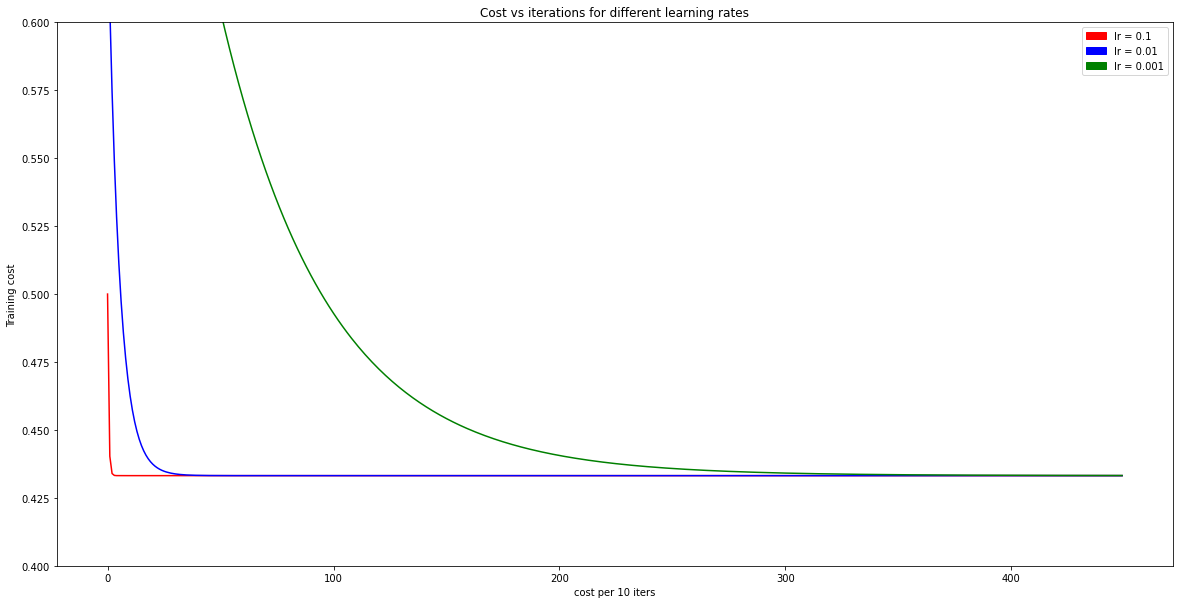

[[0.27281157 0.16601923 0.07785762]] -0.005568088160718672


In [ ]:
import matplotlib.patches as mpatches

plt.figure(figsize=(20, 10))
plt.plot(cost_list1, color="red")
plt.plot(cost_list2, color="blue")
plt.plot(cost_list3, color="green")
red_patch = mpatches.Patch(color='red', label='lr = 0.1')
blue_patch = mpatches.Patch(color='blue', label='lr = 0.01')
green_patch = mpatches.Patch(color='green', label='lr = 0.001')
plt.legend(handles = [red_patch, blue_patch, green_patch])
plt.xlabel("cost per 10 iters")
plt.ylabel("Training cost")
plt.ylim((0.4,0.6))
plt.title("Cost vs iterations for different learning rates")
plt.show()


print(w1,b1)

20 regression models part

In [ ]:
errors = []

for i in range(20):
  norm_df = norm_df.sample(frac = 1) 
  train_df = norm_df[0:int(df_size*0.7)]
  test_df = norm_df[int(df_size*0.7):]

  X_train = train_df.drop(columns = ["charges", "bias"])
  X_test = test_df.drop(columns = ["charges", "bias"])

  X_train = X_train.to_numpy()
  X_test = X_test.to_numpy()

  y_train = train_df.drop(columns = ["age", "bmi", "children", "bias"])
  y_train = y_train.to_numpy()

  y_test = test_df.drop(columns = ["age", "bmi", "children", "bias"])
  y_test = y_test.to_numpy()

  X_train = X_train.T
  X_test = X_test.T

  y_train = y_train.T
  y_test = y_test.T

  w, b, cost_list, final_errors = linear_regression(X_train, y_train, X_test, y_test, 0.001, 6000)

  errors.append(final_errors)

Streaming output truncated to the last 5000 lines.
Epoch: 1002 --> Train cost = 0.4957959208241895 | Test cost = 0.46697805145840626
Epoch: 1003 --> Train cost = 0.4957031722182364 | Test cost = 0.4668640123100723
Epoch: 1004 --> Train cost = 0.49561062943948414 | Test cost = 0.4667502042755458
Epoch: 1005 --> Train cost = 0.49551829203059494 | Test cost = 0.4666366268668697
Epoch: 1006 --> Train cost = 0.49542615953524827 | Test cost = 0.4665232795971414
Epoch: 1007 --> Train cost = 0.4953342314981388 | Test cost = 0.4664101619805107
Epoch: 1008 --> Train cost = 0.49524250746497367 | Test cost = 0.46629727353217765
Epoch: 1009 --> Train cost = 0.4951509869824706 | Test cost = 0.46618461376839
Epoch: 1010 --> Train cost = 0.4950596695983556 | Test cost = 0.4660721822064411
Epoch: 1011 --> Train cost = 0.494968554861361 | Test cost = 0.4659599783646671
Epoch: 1012 --> Train cost = 0.49487764232122233 | Test cost = 0.46584800176244556
Epoch: 1013 --> Train cost = 0.4947869315286772 | Tes

In [ ]:
len(errors)

20

In [ ]:
MSE_train_errors = []
MSE_test_errors = []
RMSE_train_errors = []
RMSE_test_errors = []
MAE_train_errors = []
MAE_test_errors = []
for i in range(20):
  MSE_train_errors.append(errors[i]["MSE_train"])
  MSE_test_errors.append(errors[i]["MSE_test"])
  RMSE_train_errors.append(errors[i]["RMSE_train"])
  RMSE_test_errors.append(errors[i]["RMSE_test"])
  MAE_train_errors.append(errors[i]["MAE_train"])
  MAE_test_errors.append(errors[i]["MAE_test"])

In [ ]:
print("Error statistics: ")
print("MSE Train error: ")
print("Mean = ", np.mean(MSE_train_errors), " Variance = ", np.std(MSE_train_errors)**2, " Min = ", np.min(MSE_train_errors))
print("-----------------------------------------")
print("MSE Test error: ")
print("Mean = ", np.mean(MSE_test_errors), " Variance = ", np.std(MSE_test_errors)**2, " Min = ", np.min(MSE_test_errors))
print("-----------------------------------------")
print("RMSE Train error: ")
print("Mean = ", np.mean(RMSE_train_errors), " Variance = ", np.std(RMSE_train_errors)**2, " Min = ", np.min(RMSE_train_errors))
print("-----------------------------------------")
print("MSE Test error: ")
print("Mean = ", np.mean(RMSE_test_errors), " Variance = ", np.std(RMSE_test_errors)**2, " Min = ", np.min(RMSE_test_errors))
print("-----------------------------------------")
print("MAE Train error: ")
print("Mean = ", np.mean(MAE_train_errors), " Variance = ", np.std(MAE_train_errors)**2, " Min = ", np.min(MAE_train_errors))
print("-----------------------------------------")
print("MAE Test error: ")
print("Mean = ", np.mean(MAE_test_errors), " Variance = ", np.std(MAE_test_errors)**2, " Min = ", np.min(MAE_test_errors))
print("-----------------------------------------")

Error statistics: 
MSE Train error: 
Mean =  0.874535235248801  Variance =  0.00054630407250555  Min =  0.818033955290517
-----------------------------------------
MSE Test error: 
Mean =  0.8943290095920151  Variance =  0.003045696448723893  Min =  0.7860516396525072
-----------------------------------------
RMSE Train error: 
Mean =  0.9350820257435778  Variance =  0.00015684038008761809  Min =  0.904452295751698
-----------------------------------------
MSE Test error: 
Mean =  0.9452419574131614  Variance =  0.00084665153775024  Min =  0.8865955332915383
-----------------------------------------
MAE Train error: 
Mean =  0.7419989348493312  Variance =  0.00021952691607078975  Min =  0.7045837524124245
-----------------------------------------
MAE Test error: 
Mean =  0.7459356301355489  Variance =  0.0001914616788243241  Min =  0.7220654917746137
-----------------------------------------


**BATCH GRADIENT DESCENT**

In [ ]:
def batch_gd(X_train, y_train, X_test, y_test, lr, epochs, batch_size):
  lenw = X_train.shape[0]
  w, b = init_params(lenw)
  costs_list = []
  final_errors = {"MSE_test": 0, "MSE_train": 0, "RMSE_test": 0, "RMSE_train": 0, "MAE_test": 0, "MAE_train": 0}
  count = 0

  for i in range(1, epochs+1):
    start = 0
    while(start+batch_size < df_size*0.7):
      temp_x_train = X_train[:,start:start+batch_size]
      temp_x_test = X_test[:,start:start+batch_size]
      temp_y_train = y_train[:,start:start+batch_size]
      temp_y_test = y_test[:,start:start+batch_size]

      temp_z_train = predict(temp_x_train, w, b)
      z_train = predict(X_train, w, b)
      cost_train = cost_function(temp_z_train, temp_y_train)
      dw, db = get_grads(temp_x_train, temp_y_train, temp_z_train)
      #print("GRAD SHAPES = ", dw.shape, " ", db.shape)
      w, b = update_params(w, b, dw, db, lr)

      #print("W SHAPE NOW = ", w.shape)
      if(count%50 == 0):
        costs_list.append(cost_train)


      MSE_train = np.mean(np.square(z_train-y_train))
      RMSE_train = np.sqrt(MSE_train)
      MAE_train = np.mean(np.abs(z_train-y_train))

      z_test = predict(X_test, w, b)
      cost_test = cost_function(z_test, y_test)
      MSE_test = np.mean(np.square(z_test-y_test))
      RMSE_test = np.sqrt(MSE_test)
      MAE_test = np.mean(np.abs(z_test-y_test))


      print("Epoch: " + str(i) + " --> " + "Train cost = " + str(cost_train) + " | Test cost = " + str(cost_test))
      count += 1

      start += batch_size

    if(i == epochs):
      final_errors["MSE_test"] += MSE_test
      final_errors["MSE_train"] += MSE_train
      final_errors["RMSE_test"] += RMSE_test
      final_errors["RMSE_train"] += RMSE_train
      final_errors["MAE_train"] += MAE_train
      final_errors["MAE_test"] += MAE_test
  # plt.plot(costs_list)
  # plt.xlabel("cost per 10 iters")
  # plt.ylabel("Training cost")
  # plt.title("Learning rate = " + str(lr))
  # plt.show()
  return w, b, costs_list, final_errors

In [ ]:
w1, b1, cost_list1, final_errors1 = batch_gd(X_train, y_train, X_test, y_test, 0.001, 70, 1)
w2, b2, cost_list2, final_errors2 = batch_gd(X_train, y_train, X_test, y_test, 0.01, 70, 1)
w3, b3, cost_list3, final_errors3 = batch_gd(X_train, y_train, X_test, y_test, 0.1, 70, 1)

Streaming output truncated to the last 5000 lines.
Epoch: 65 --> Train cost = 1.3281008273035326 | Test cost = 0.6007578415663316
Epoch: 65 --> Train cost = 1.014610881207408 | Test cost = 0.5128693849105938
Epoch: 65 --> Train cost = 0.4761741046449153 | Test cost = 0.49041049408055226
Epoch: 65 --> Train cost = 0.0878956358427462 | Test cost = 0.47156517689057625
Epoch: 65 --> Train cost = 0.1446217202262531 | Test cost = 0.48632880540811124
Epoch: 65 --> Train cost = 0.11494597139074544 | Test cost = 0.454025822976382
Epoch: 65 --> Train cost = 0.1998929841091298 | Test cost = 0.45048174447109895
Epoch: 65 --> Train cost = 0.18740220448318703 | Test cost = 0.4648837129379889
Epoch: 65 --> Train cost = 0.07346428628142856 | Test cost = 0.4723523487468423
Epoch: 65 --> Train cost = 0.049259917510504174 | Test cost = 0.48150817689110387
Epoch: 65 --> Train cost = 0.17069130542941796 | Test cost = 0.48919780597328183
Epoch: 65 --> Train cost = 0.03565681332134547 | Test cost = 0.5075028

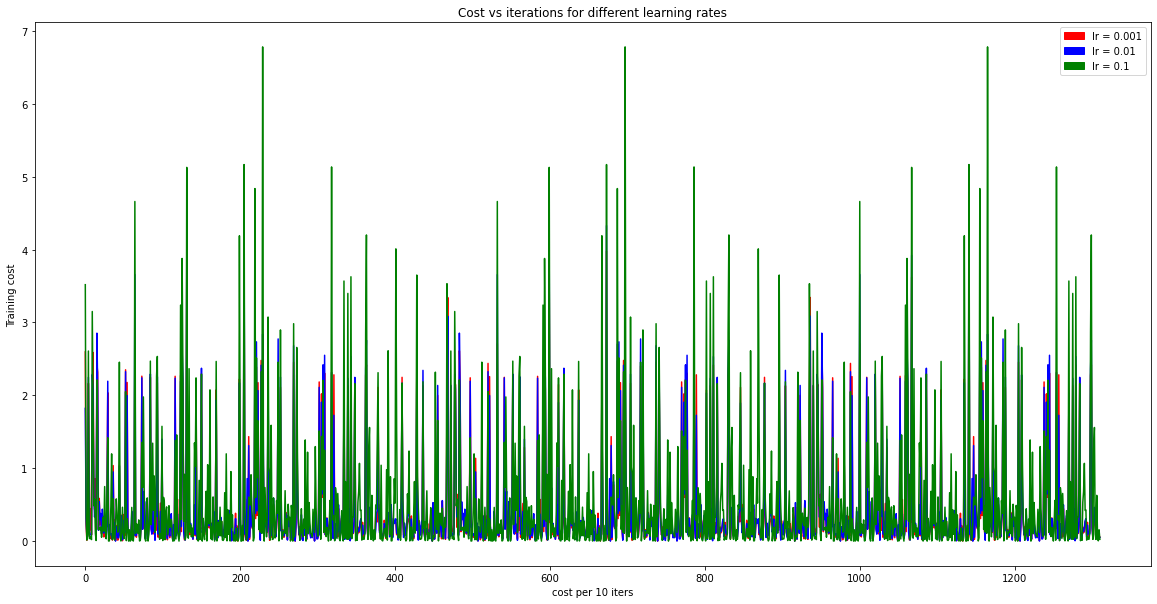

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(cost_list1, color="red")
plt.plot(cost_list2, color="blue")
plt.plot(cost_list3, color="green")
red_patch = mpatches.Patch(color='red', label='lr = 0.001')
blue_patch = mpatches.Patch(color='blue', label='lr = 0.01')
green_patch = mpatches.Patch(color='green', label='lr = 0.1')
plt.legend(handles = [red_patch, blue_patch, green_patch])

plt.xlabel("cost per 10 iters")
plt.ylabel("Training cost")
plt.title("Cost vs iterations for different learning rates")
plt.show()

20 REGRESSION MODELS OF SGD

In [ ]:
errors = []
for i in range(20):
  norm_df = norm_df.sample(frac = 1) 
  train_df = norm_df[0:int(df_size*0.7)]
  test_df = norm_df[int(df_size*0.7):]

  X_train = train_df.drop(columns = ["charges", "bias"])
  X_test = test_df.drop(columns = ["charges", "bias"])

  X_train = X_train.to_numpy()
  X_test = X_test.to_numpy()

  y_train = train_df.drop(columns = ["age", "bmi", "children", "bias"])
  y_train = y_train.to_numpy()

  y_test = test_df.drop(columns = ["age", "bmi", "children", "bias"])
  y_test = y_test.to_numpy()

  X_train = X_train.T
  X_test = X_test.T

  y_train = y_train.T
  y_test = y_test.T

  w, b, cost_list, final_errors1 = batch_gd(X_train, y_train, X_test, y_test, 0.001, 100, 1)

  errors.append(final_errors)

Streaming output truncated to the last 5000 lines.
Epoch: 95 --> Train cost = 0.1447408960975597 | Test cost = 0.45518878837658455
Epoch: 95 --> Train cost = 0.08029119017443881 | Test cost = 0.4551552461545986
Epoch: 95 --> Train cost = 0.15054623840105788 | Test cost = 0.4551197567728911
Epoch: 95 --> Train cost = 0.19435121811325887 | Test cost = 0.45513187972980657
Epoch: 95 --> Train cost = 2.7348163147289615 | Test cost = 0.4547214536421354
Epoch: 95 --> Train cost = 2.3403881626457683 | Test cost = 0.45439686161514975
Epoch: 95 --> Train cost = 0.10053127842112326 | Test cost = 0.45441764270900464
Epoch: 95 --> Train cost = 0.2136620523678483 | Test cost = 0.45444754453052205
Epoch: 95 --> Train cost = 0.3451615766607299 | Test cost = 0.45463985338408974
Epoch: 95 --> Train cost = 2.2602623187604074 | Test cost = 0.4544717305064567
Epoch: 95 --> Train cost = 0.16072385563405192 | Test cost = 0.4544569990339673
Epoch: 95 --> Train cost = 0.1234108014907586 | Test cost = 0.4545770

In [ ]:
len(errors)

20

In [ ]:
MSE_train_errors = []
MSE_test_errors = []
RMSE_train_errors = []
RMSE_test_errors = []
MAE_train_errors = []
MAE_test_errors = []
for i in range(20):
  MSE_train_errors.append(errors[i]["MSE_train"])
  MSE_test_errors.append(errors[i]["MSE_test"])
  RMSE_train_errors.append(errors[i]["RMSE_train"])
  RMSE_test_errors.append(errors[i]["RMSE_test"])
  MAE_train_errors.append(errors[i]["MAE_train"])
  MAE_test_errors.append(errors[i]["MAE_test"])

In [ ]:
print("Error statistics: ")
print("MSE Train error: ")
print("Mean = ", np.mean(MSE_train_errors), " Variance = ", np.std(MSE_train_errors)**2, " Min = ", np.min(MSE_train_errors))
print("-----------------------------------------")
print("MSE Test error: ")
print("Mean = ", np.mean(MSE_test_errors), " Variance = ", np.std(MSE_test_errors)**2, " Min = ", np.min(MSE_test_errors))
print("-----------------------------------------")
print("RMSE Train error: ")
print("Mean = ", np.mean(RMSE_train_errors), " Variance = ", np.std(RMSE_train_errors)**2, " Min = ", np.min(RMSE_train_errors))
print("-----------------------------------------")
print("MSE Test error: ")
print("Mean = ", np.mean(RMSE_test_errors), " Variance = ", np.std(RMSE_test_errors)**2, " Min = ", np.min(RMSE_test_errors))
print("-----------------------------------------")
print("MAE Train error: ")
print("Mean = ", np.mean(MAE_train_errors), " Variance = ", np.std(MAE_train_errors)**2, " Min = ", np.min(MAE_train_errors))
print("-----------------------------------------")
print("MAE Test error: ")
print("Mean = ", np.mean(MAE_test_errors), " Variance = ", np.std(MAE_test_errors)**2, " Min = ", np.min(MAE_test_errors))
print("-----------------------------------------")

Error statistics: 
MSE Train error: 
Mean =  0.874535235248801  Variance =  0.00054630407250555  Min =  0.818033955290517
-----------------------------------------
MSE Test error: 
Mean =  0.8943290095920151  Variance =  0.003045696448723893  Min =  0.7860516396525072
-----------------------------------------
RMSE Train error: 
Mean =  0.9350820257435778  Variance =  0.00015684038008761809  Min =  0.904452295751698
-----------------------------------------
MSE Test error: 
Mean =  0.9452419574131614  Variance =  0.00084665153775024  Min =  0.8865955332915383
-----------------------------------------
MAE Train error: 
Mean =  0.7419989348493312  Variance =  0.00021952691607078975  Min =  0.7045837524124245
-----------------------------------------
MAE Test error: 
Mean =  0.7459356301355489  Variance =  0.0001914616788243241  Min =  0.7220654917746137
-----------------------------------------
